# Warmup with Python

<br>

reference and credit: <br> 
Rob McCulloch - professor at ASU, School of Mathematical and Statistical Sciences <br>
Prof. McCulloch's webpage: <https://www.rob-mcculloch.org>  - excellent source of machine learning notes, codes in R and Python, datasets and links to other related material. <br> 
Our class notes will mostly be slight-to-medium modifications of his notes. <br> 
All possible errors in our class notes are my responsibility. <br> 


Just to warm up, in this notebook we will do a very basic data analysis using `pandas` and `sklearn` python modules. We will 


* read in the data  
* plot the data  
* fit a simple multiple regression model, getting fits, predictions and standard inference.  


## Import Needed Modules    

We need to import numpy, pandas, and matplot.pyplot (as np, pd, and plt).  
numpy gives as vector/matrix/array operations, pandas gives us "data frames" data structures,
and matplot.pyplot give us graphics.  

We also import LinearRegression from sklearn.linear_model to run the multiple regression.  

We also import statsmodels.api (as sm) to get inference and summaries (e.g. R-squared, t-stats, p-values) for multiple regression.  



In [27]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


#ipython magic function, helps display of plots in a notebook
%matplotlib inline 

## Read in the Data and Get the Variables (Using  `pandas`) 

We will  

* read in the data to a `pandas` data frame
* do some simple summaries

<br>

Detailed `pandas` documentation can be found at <https://pandas.pydata.org/docs/user_guide/index.html#user-guide>

<br>

First we will read in the data from the `kc_house_data.csv` found at Kaggle: https://www.kaggle.com/harlfoxem/housesalesprediction 


In [28]:
##the following data set is taken from https://www.kaggle.com/harlfoxem/housesalesprediction
##read in the data; if not in the same folder with Jnb, need full file pathb
df = pd.read_csv("kc_house_data.csv") 
print(type(df))
df.head() 

<class 'pandas.core.frame.DataFrame'>


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Recall that python is a 0-indexing language. That's why the 1st row (observation) in the data is indexed by 0. <br>
Use `iloc` method for calling entries (or subsets of data frames) by their indices.

In [29]:
##getting the entry in the 1st row and 3rd column (price of the first house)
df.iloc[0,2]

221900.0

We can also do this by variable/feature name

In [30]:
df['price'][0]

221900.0

In [31]:
print(df['id'][:4])
df[['id','price']][:4]

0    7129300520
1    6414100192
2    5631500400
3    2487200875
Name: id, dtype: int64


,id,price
0,7129300520,221900.0
1,6414100192,538000.0
2,5631500400,180000.0
3,2487200875,604000.0


In [32]:
df.iloc[2:4,:]  #print 2nd and 3rd row

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2,5631500400,20150225T000000,180000.0,2,1.0,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.0,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000


In [33]:
X = df[['sqft_living','yr_built']].to_numpy()  
y = df['price'].values  ##as a numpy vector

print(X.shape, y.shape, len(y))  #a touple with dimensions/length of X and y

print(X[:5,:])

y[:5]

(21613, 2) (21613,) 21613
[[1180 1955]
 [2570 1951]
 [ 770 1933]
 [1960 1965]
 [1680 1987]]


array([221900., 538000., 180000., 604000., 510000.])

## Plot y vs x  

  
  
Now let's plot `price` vs. `sqft_living`.  



Text(0.5, 1.0, 'price vs. sqft_living')

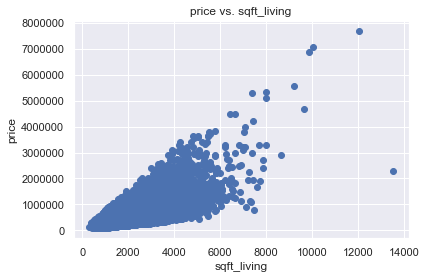

In [34]:
plt.scatter(X[:,0],y) #X[:,0] = the 1st column of X (i.e. price)
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.title("price vs. sqft_living")

### Basic Regression - using Boston Housing Data (from `sklearn`)

Module `sklearn` has some "toy" datasets that are useful when learning  `sklearn` methods/functions and tools that these functions apply.

<br>

<https://scikit-learn.org/stable/datasets/toy_dataset.html>

<br>

Using `sklearn.datasets.load_boston()` we load a well known `Boston` dataset, which contains 14 variables/features/attributes. Here, we focus on the 2nd, 5th and the 8th feature in the dataset:

$2^{\text{nd}}$:  ZN proportion of residential land zoned for lots over 25,000 sq.ft.

$5^{\text{th}}$:  NOX - nitric oxides concentration (parts per 10 million)

$8^{\text{th}}$:  DIS - weighted distances to five Boston employment centres


Keep in mind that python is a 0-indexing languge, so the corresponding python indices of these features are 1, 4 and 7, respectively.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[24.  21.6 34.7 33.4 36.2 28.7]
[4.98 9.14 4.03 2.94 5.33 5.21]


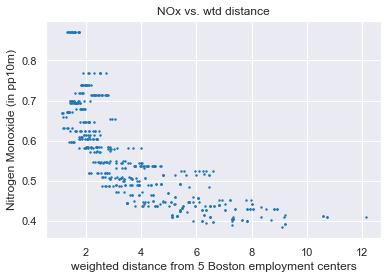

In [35]:
from sklearn.datasets import load_boston
df, y = load_boston(return_X_y=True)


plt.scatter(df[:,7],df[:,4],s=2,c=tuple(np.array([31,119,180])/255))
plt.xlabel("weighted distance from 5 Boston employment centers")
plt.ylabel("Nitrogen Monoxide (in pp10m)")
plt.title("NOx vs. wtd distance")

X = df[:,[7,4]]

print(y[0:6])
print(df[0:6,12])

In [36]:
pddf = pd.DataFrame(df) #convert to pandas data frame
pddf.head(4) #print first 5 rows

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94


In [37]:
from sklearn.datasets import load_boston
df, y = load_boston(return_X_y=True)

x = df[:,7]
y = df[:,4]

print(x.shape)
print(y.shape)


(506,)
(506,)


Recall the simple (toy) linear regression model:

$$y = \beta_0 + \beta_1 x + \varepsilon$$

where $\varepsilon$ is a random variable, independent of the observed (or tuned) value of $x$.

We assume $E[\varepsilon]=0$ (we can always do that by replacing $\beta_0$ with $\beta_0-E[\varepsilon]$), which yields

$$E[y|x] = \beta_0 + \beta_1 \cdot x$$

In our case, 

$$\begin{align}\text{NOX} &= \beta_0 + \beta_1 \cdot \text{DIS} + \varepsilon \nonumber \\ 
 \\ 
E[NOX\,|\,DIS] &= \beta_0 + \beta_1 \cdot \text{DIS}
\end{align}$$
<br>

Even if this model is physically accurate (which is only in our dreams!), we will never know what the true $\beta_0$ and $\beta_1$ are. But, based on the data $(x_i,y_i)=(\text{NOx}_i, \text{dist}_i)$, we want to estimate $\beta_0$ and $\beta_1$. Call the corresponding estimates $\hat{\beta}_0$ and $\hat{\beta}_1$. Also, denote by $\hat{y}$ the estimate of $E[y|x]$.

So, based on the observed (i.e. trained) data $(x_i,y_i)=(\text{DIS}_i, \text{NOX}_i)$, $i=1,...,$`df.shape[0]`, we want to ***fit*** (i.e. ***train***) the model:

$$\hat{y} = \widehat{E[y|x]} = \hat{\beta}_0 + \hat{\beta}_1 \,x$$

<br>


In [38]:
## To apply LinearRegression() function, we need to set  `x.shape` to `(506,1)`
x.shape = (len(x),1)

mod1 = LinearRegression()
mod1.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
mod1.intercept_ , mod1.coef_   #print bhat_0 and bhat_1 

(0.715342618777651, array([-0.0423309]))

<br> <br>

So, our fitted model is 

$$\begin{align}\hat{y} &= 0.715 - 0.042 \cdot x \\ 
 \\ 
\widehat{\text{NOX}} &= 0.715 - 0.042 \cdot \text{DIS}
\end{align}$$

#### Example

Let us estimate average (i.e. expected) nitrogen monoxide (NOX in ppm) if the weighted distance from the five employer centers is DIS = 4mi. <br>

$\text{NOX} = 0.715 - 0.042 \cdot \text{DIS} = 0.715 - 0.042 \cdot 4 = 0.547$ <br> 

Is this a good prediction at all!?? How good is it? <br>

We can do this programmatically (and without rounding)

In [40]:
##from the following query we see the input should be array-like object
##with 2 dimensions (n_samples, n_features)
?mod1.predict

dis = np.array([4],ndmin=2) #convert input into numpy array w/ two dimenstions
mod1.predict(dis)

array([0.54601903])

Text(0.5, 1.0, 'NOx vs. wtd distance')

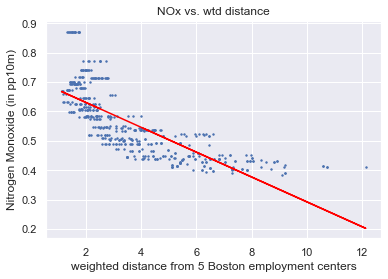

In [41]:
yhat = mod1.predict(x)

plt.scatter(x, y, s=2)
plt.plot(x, yhat, color = 'red')
plt.xlabel("weighted distance from 5 Boston employment centers")
plt.ylabel("Nitrogen Monoxide (in pp10m)")
plt.title("NOx vs. wtd distance")



<br>
So, our estimate for NOX at DIS=4 is not good! &#128549; <br>
At points like DIS=8 or DIS=10 would be even worse.

<br>

Let's try to include another variable: ZN = proportion of residential land zoned for lots over 25,000 sq.ft.
<br>
Now, we have a model 

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \varepsilon$$

i.e. 

$$\text{NOX} = \beta_0 + \beta_1 \,\text{DIS} + \beta_2 \,\text{ZN} + \varepsilon$$

In [42]:
y = df[:,4]
X = df[:,[7,1]]  


mod2 = LinearRegression(fit_intercept=True)  #True is default for fit_intercept
mod2.fit(X,y)

print("Model Intercept:",mod2.intercept_)
print("Model Slopes:    ",mod2.coef_)

Model Intercept: 0.7145291937468131
Model Slopes:     [-4.19695079e-02 -4.91093182e-05]


<br>
So, our trained (i.e. fitted) model is:

$$\widehat{\text{NOX}} = 0.715 - 4.197 \cdot \text{DIS} - 4.911 \cdot \text{ZN}$$

<br>

Does this make sense? In particular, does it make sense that $\beta_1, \beta_2 < 0$?

In [43]:
#get predictions at the X-values in the observed sample
yhat = mod2.predict(X)

len(yhat), type(yhat) #print length and type of yhat

(506, numpy.ndarray)

## Plot $\hat{y}$ vs. $y$

If predictions are good, plotting $\hat{y}$ vs. $y$ should roughly follow the identity function.

Text(0, 0.5, 'yhat')

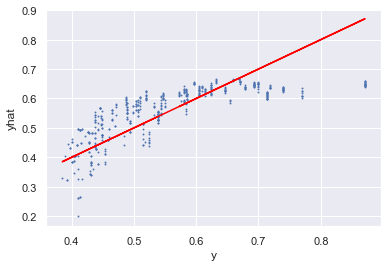

In [44]:
plt.scatter(y,yhat,s=.8) 
plt.plot(y,y,c='red') #add the identity line
plt.xlabel("y"); plt.ylabel("yhat")

<br>

Also, bad!  <p style="font-size: 25px">&#128549;</p>

We will later discuss more complex regression models as well as other models that could improve prediction.

In [45]:
from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston() ## loads Boston dataset from datasets library 

import numpy as np
import pandas as pd
# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])

import statsmodels.api as sm # import statsmodels 

X = df["RM"] ## X is usually a matrix of sample of input (explanatory) variables/features
y = target["MEDV"] ## y or Y usually represents output variable(s) 
X = sm.add_constant(X) ## including the intercept beta_0 into the model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           2.49e-74
Time:                        16:01:45   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
X = df[["RM", "LSTAT"]]
y = target["MEDV"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              4637.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):                        0.00
Time:                        16:01:47   Log-Likelihood:                         -1582.9
No. Observations:                 506   AIC:                                      3170.
Df Residuals:                     504   BIC:                                      3178.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9069      0.070     69.906      0.000       4.769       5.045
LSTAT         -0.6557      0.031    -21.458      0.000      -0.716      -0.596
==============================================================================
Omnibus:                      145.153   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.157
Skew:                           1.351   Prob(JB):                     9.70e-97
Kurtosis:                       6.698   Cond. No.                         4.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""